### iris data set

In [1]:
path=r"/workspaces/iris-streamlit-Deployment-26-oct-2025/notebook/iris 1.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(path)

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [17]:
df.drop_duplicates(keep="first", ignore_index=True, inplace=True)

In [18]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
x=df.drop(['species'], axis=1)
y=df['species']

In [20]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [25]:
### train test split
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=3)

In [28]:
print(x_train.shape,y_train.shape)
print(y_test.shape,x_test.shape)

(126, 4) (126,)
(23,) (23, 4)


In [31]:
a=y.value_counts()
a

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

<Axes: xlabel='species'>

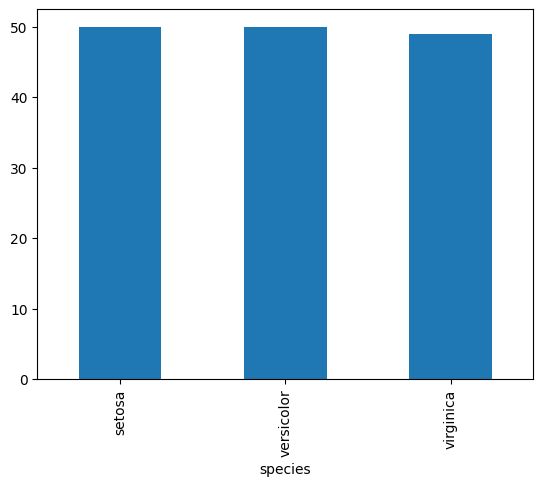

In [32]:
a.plot(kind="bar")

In [44]:
model=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean")),
("scaler", StandardScaler()),("model",LogisticRegression())])

In [45]:
model

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [46]:
model.fit(x_train,y_train)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [ ]:
model.score(x_train,y_train)

0.9682539682539683

In [48]:
model.score(x_test,y_test)

1.0

In [49]:
#cross validation score
from sklearn.model_selection import cross_val_score

In [52]:
cv=cross_val_score(model,x_train,y_train,cv=5,n_jobs=-1)

In [53]:
cv

array([0.88461538, 0.92      , 1.        , 1.        , 0.92      ])

In [54]:
cv.mean()

np.float64(0.944923076923077)

In [56]:
#model evaluation
from sklearn.metrics import classification_report , ConfusionMatrixDisplay

In [57]:
train_pred=model.predict(x_train)

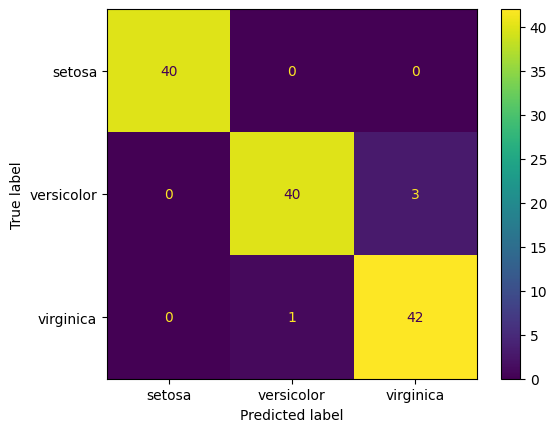

In [62]:
ConfusionMatrixDisplay.from_estimator(model,x_train,y_train)

In [58]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.98      0.93      0.95        43
   virginica       0.93      0.98      0.95        43

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



In [60]:
#testing evaluation 

test_pred=model.predict(x_test)

In [61]:
test_pred

array(['versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa'], dtype=object)

In [63]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         7
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



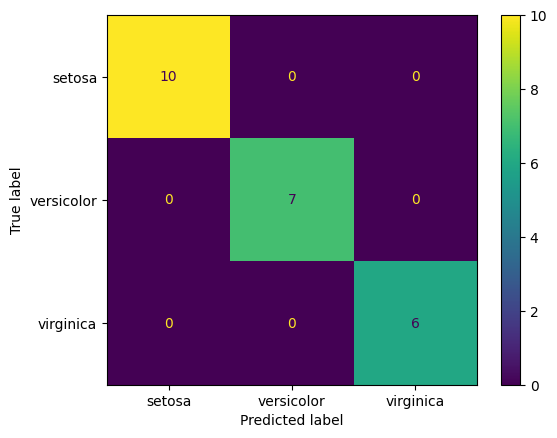

In [64]:
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)

In [65]:
#from above we have seen that this model is performing
# good on training and testing we can use for future prediction


In [66]:
# save this model using joblib library

In [67]:
import joblib

In [72]:
joblib.dump(model,"iris_model.joblib")

['iris_model.joblib']

In [73]:
m=joblib.load("iris_model.joblib")

In [74]:
m.score(x_train,y_train)

0.9682539682539683

In [75]:
m.predict(x_train)

array(['virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolo